In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

(6, 1) (6, 1)


(-0.1, 5.1)

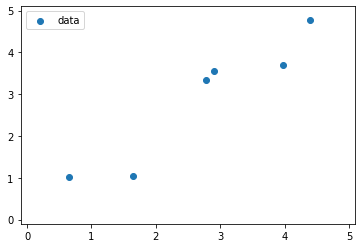

In [10]:
X = np.random.uniform(low=0.1,high=4.5,size=(6,1))
y = 1.1*X+0.1+np.random.normal(0,0.5,size=X.shape)

print(X.shape,y.shape)

plt.scatter(X,y,label='data')
plt.legend()
plt.xlim([-0.1,5.1])
plt.ylim([-0.1,5.1])

In [11]:
def model(X,w1,w0):
  return w1*X+w0

def loss(y_target,y_pred):
  error = y_target-y_pred
  return np.sum(error**2)/2,error

def myplot(w1,w0):

  X_test = np.array([-10,10]).reshape(-1,1) #dos datos de prueba
  y_test = model(X_test,w1,w0)
  y_pred = model(X,w1,w0)
  l,error = loss(y,y_pred)
  
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.scatter(X,y,label='data')
  plt.scatter(X,y_pred,color='k',marker='o',facecolors='none',label='prediction')
  plt.plot(X_test,y_test,'r',label='model')
  for xn,yn,yn_pred,en in zip(X,y,y_pred,error):
    plt.fill([xn,xn-en,xn-en,xn], [yn,yn,yn_pred,yn_pred],alpha=0.5)
    plt.plot([xn,xn],[yn,yn_pred],'b')
  plt.legend()
  plt.title('MSE  {:0.3}'.format(l))
  plt.xlim([-0.1,5.1])
  plt.ylim([-0.1,5.1])

  plt.subplot(1,2,2)
  plt.scatter(y,y_pred)
  plt.plot([0,5],[0,5])
  plt.xlim([0,5])
  plt.ylim([0,5])
  plt.xlabel('Target')
  plt.ylabel('Predicted')
  plt.show()

Los parámetros w1 y w0 controlan la pendiente y el intercepto del modelo:

$y=w_1x+w_0$

Cada cuadro de la siguiente figura tiene un área equivalente al error cuadrático de su correspondiente muestra.

In [12]:
interactive_plot = interactive(myplot, w1=(-5,5,0.01), w0=(-5,5,0.01))
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w1', max=5.0, min=-5.0, step=0.01), FloatSlider(valu…

$\phi(x)=[1,x]$

$y=w^\top\phi$

$w=[w_0,w_1]$

Phi: (6, 2) 
 [[1.         0.64587057]
 [1.         4.39519259]
 [1.         1.64357747]
 [1.         2.90669997]
 [1.         2.77882428]
 [1.         3.97410928]]
w: (2, 1) 
 [[0.0894475 ]
 [1.03327478]]


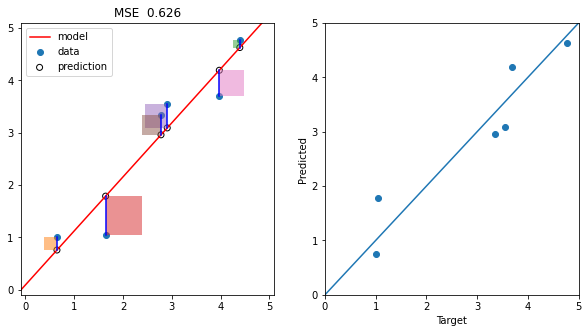

In [13]:
Phi = np.concatenate([np.ones(X.shape),X],axis=1)
print('Phi:',Phi.shape,'\n',Phi)

w = np.linalg.pinv(Phi)@y #pinv=pseudo-inverse
print('w:',w.shape,'\n',w)

myplot(w[1],w[0])

In [14]:
def model_poly(X,w):
  P = len(w)  
  Phi = np.concatenate([X**p for p in range(P)],axis=1) #Bases
  print(Phi.shape,w.shape)
  return Phi@w

def myplot_poly(w):

  X_test = np.linspace(-10,10,500).reshape(-1,1) #dos datos de prueba
  y_test = model_poly(X_test,w)
  y_pred = model_poly(X,w)
  l,error = loss(y,y_pred)
  
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.scatter(X,y,label='data')
  plt.scatter(X,y_pred,color='k',marker='o',facecolors='none',label='prediction')
  plt.plot(X_test,y_test,'r',label='model')
  for xn,yn,yn_pred,en in zip(X,y,y_pred,error):
    plt.fill([xn,xn-en,xn-en,xn], [yn,yn,yn_pred,yn_pred],alpha=0.5)
    plt.plot([xn,xn],[yn,yn_pred],'b')
  plt.legend()
  plt.title('MSE  {:0.3}'.format(l))
  plt.xlim([-0.1,5.1])
  plt.ylim([-0.1,5.1])

  plt.subplot(1,2,2)
  plt.scatter(y,y_pred)
  plt.plot([0,5],[0,5])
  plt.xlim([0,5])
  plt.ylim([0,5])
  plt.show()

Phi: (6, 3) 
 [[ 1.          0.64587057  0.41714879]
 [ 1.          4.39519259 19.31771786]
 [ 1.          1.64357747  2.70134688]
 [ 1.          2.90669997  8.44890469]
 [ 1.          2.77882428  7.72186438]
 [ 1.          3.97410928 15.79354457]]
w: (3, 1) 
 [[ 0.04781386]
 [ 1.07755736]
 [-0.0087125 ]]
(500, 3) (3, 1)
(6, 3) (3, 1)


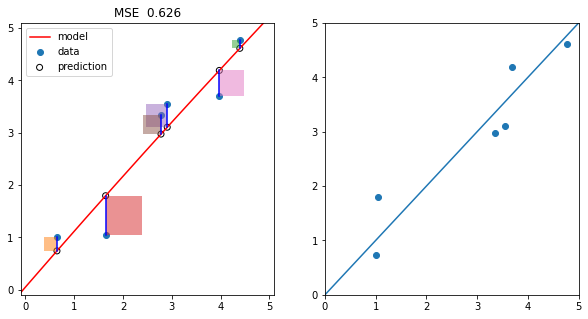

In [15]:
P = 2

Phi = np.concatenate([X**p for p in range(P+1)],axis=1)
print('Phi:',Phi.shape,'\n',Phi)

w = np.linalg.pinv(Phi)@y
print('w:',w.shape,'\n',w)

myplot_poly(w)